<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · PEC1</p>
<p style="margin: 0; text-align:right;">2021-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Redes neuronales artificiales

En esta práctica implementaremos redes neuronales artificiales para resolver problemas de:

   - Clasificación
   - Regresión   


**Importante: La entrega debe hacerse en formato notebook y en formato html donde se vea el código y los resultados y comentarios de cada ejercicio. Para exportar el notebook a html puede hacerse desde el menú File $\to$ Download as $\to$ HTML.**

# Autor: Mario Ubierna San Mamés

## 0. Contexto y carga de librerías

El siguiente código carga los paquetes necesarios para la práctica y lee el fichero de datos que usaremos.

Los datos contienen información sobre coches de segunda mano, sus características y el precio de re-venta en euros. En un primer ejercicio diseñaremos un modelo que nos permita clasificar los coches en tres grupos según su gama de precio. En el segundo ejercicio diseñaremos un modelo de regresión para predecir el precio de re-venta.

In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer

In [2]:
##To read directly from Drive in Google Colab use:
from google.colab import drive
drive.mount('/content/drive')
#input path: "./drive/MyDrive/CarPricesData.pkl"

##To read in Kaggle, upload file in Kaggle 
##input path: "/kaggle/input/botnetdl/botnet_dataset_DL.csv"

Mounted at /content/drive


In [83]:
df = pd.read_csv("./drive/MyDrive/DeepLearning/PEC1/data/dataset.csv") #change path if needed
df_copy = df.copy()

In [84]:
df.head(5)

,months_old,km,fuel_type,horsepower,metcolor,automatic,size_engine,doors_num,weight,price
0,73,97494,Petrol,110,1,0,1600,5,1085,10950
1,48,89049,Petrol,97,1,0,1400,5,1060,13500
2,40,161000,Diesel,69,1,0,1900,3,1105,13950
3,37,38812,Petrol,97,0,0,1400,3,1025,13450
4,55,33230,Petrol,110,0,0,1600,3,1050,13500


In [85]:
df_copy.head(5)

,months_old,km,fuel_type,horsepower,metcolor,automatic,size_engine,doors_num,weight,price
0,73,97494,Petrol,110,1,0,1600,5,1085,10950
1,48,89049,Petrol,97,1,0,1400,5,1060,13500
2,40,161000,Diesel,69,1,0,1900,3,1105,13950
3,37,38812,Petrol,97,0,0,1400,3,1025,13450
4,55,33230,Petrol,110,0,0,1600,3,1050,13500


## 1. Exploración (1 punto)



En primer lugar exploraremos el conjunto de datos. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Explora los datos: 

<ul>
        
<li> Indica el tamaño del dataset y el número de variables categóricas y continuas del conjunto de datos</li> 
<li>   Grafica las distribuciones de las variables categóricas y de las continuas</li>
<li>    Genera una tabla de correlaciones de todas las variables usando la librería <code>seaborn</code>, mostrando en cada casilla el valor de la correlación</li>
<li>    Genera una tabla (usando la librería <code>seaborn</code>) que muestre únicamente las correlaciones entre el precio y el resto de variables, ordenada de mayor a menor según los valores de correlación</li>
<li>  Comenta los resultados de la exploración de datos</li>
</ul>

</div>



*   **Variables**



In [86]:
#Dataset size
print("El número de variables es: " + str(df_copy.shape[1]))
print("El número de registros es: " + str(df_copy.shape[0]))

El número de variables es: 10
El número de registros es: 1436


In [87]:
#Number of categorical and continuous variables
num_categorical_variables = df_copy.select_dtypes(exclude=["number", "bool_"]).shape[1]
num_continuous_variables = df_copy.select_dtypes(include="number").shape[1]

print("El número de variables categóricas es: " + str(num_categorical_variables))
print("El número de variables continuas es: " + str(num_continuous_variables))

El número de variables categóricas es: 1
El número de variables continuas es: 9


*   **Distribuciones**





Text(0.5, 0, 'fuel_type')

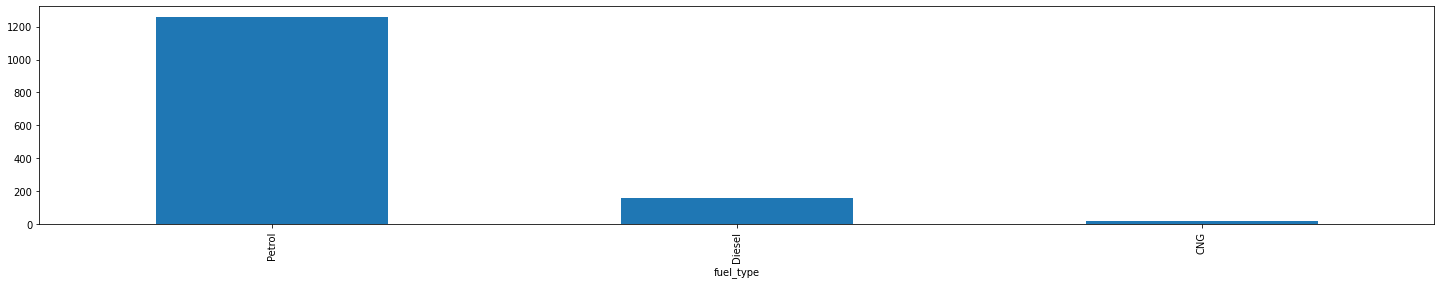

In [88]:
 #Distributions of categorical variables
 fig, axis = plt.subplots(nrows=1, ncols=num_categorical_variables, figsize=(25,4))

 name_columns_categorical = df_copy.select_dtypes(exclude=["number", "bool_"]).columns
 
 df_copy[name_columns_categorical[0]].value_counts().plot(kind="bar")
 plt.xlabel(name_columns_categorical[0])

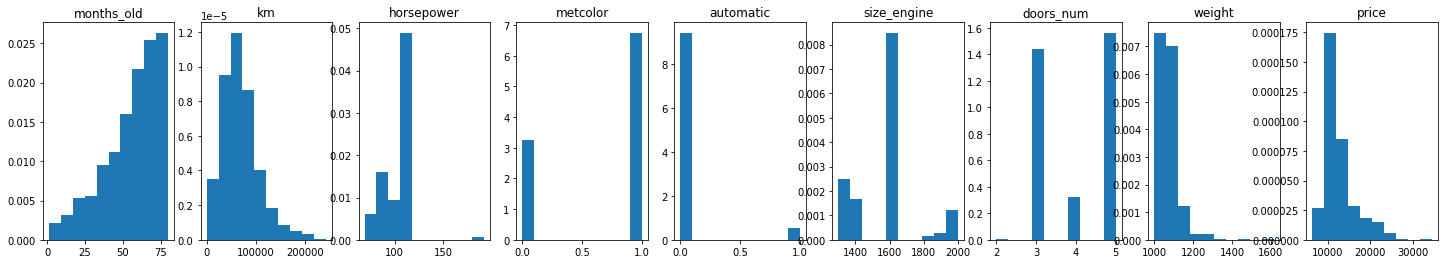

In [89]:
#Distributions continuous variables
fig, axis = plt.subplots(nrows=1, ncols=num_continuous_variables, figsize=(25,4))

name_columns_numerical = df_copy.select_dtypes(include="number").columns

for i, ax in enumerate(axis):
  ax.set_title(name_columns_numerical[i])
  ax.hist(df_copy[name_columns_numerical[i]], density=True, bins=10)



*   **Correlaciones**

Cundo en el enunciado indica generar una tabla con seaborn, entiendo que se refiere a un heatmap.




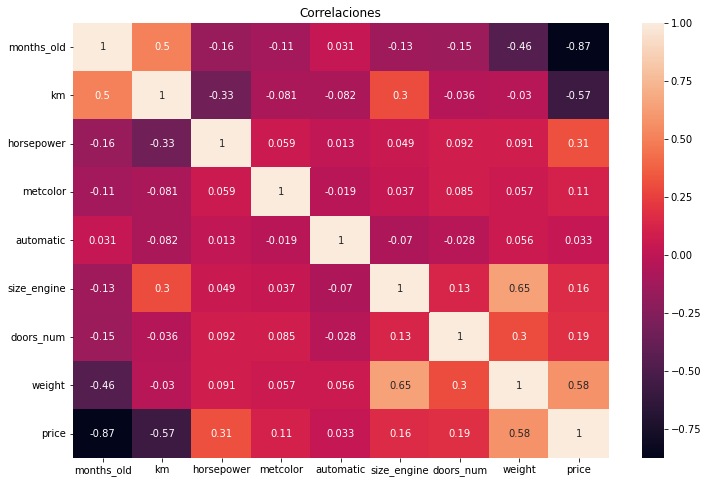

In [90]:
#All variables correlations

correlations = df_copy.corr()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(correlations, annot=True)
plt.title("Correlaciones")
plt.show()

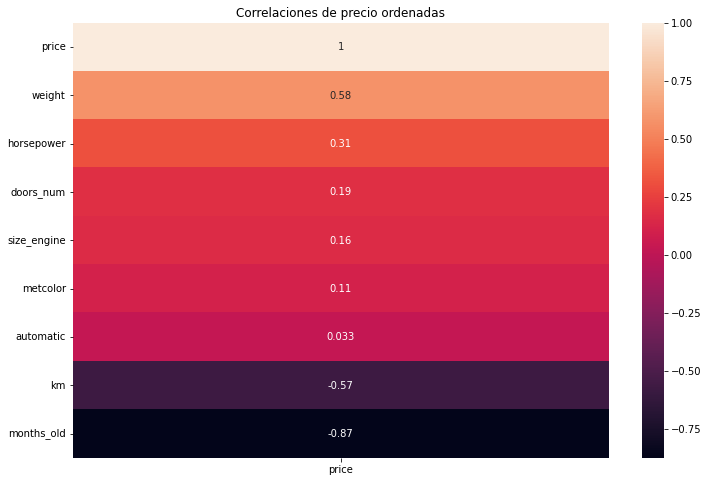

In [91]:
#Features correlating with Price

correlations_ordered = correlations.sort_values("price", ascending=False)
df_correlations_price_ordered = pd.DataFrame(
    {
        "price": correlations_ordered["price"].values
    },
    index=correlations_ordered["price"].index
)

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_correlations_price_ordered, annot=True)
plt.title("Correlaciones de precio ordenadas")
plt.show()



*   **Comentarios resultado exploración**



El primer punto a destacar es que el *dataset* está formado por 10 variables, 9 de éstas son variables continuas y solamente "fuel_type" es una variable categórica. Además, el *dataset* presenta un total de 1436 registros.

El segundo punto que hemos realizado es graficar las distribuciones de todas las variables, obteniendo la siguiente información:

* Respecto a "fuel_type" vemos que la mayoría de los vehículos son de tipo gasolina ("petrol") y después le sigue los vehículos diésel, son muy pocos los que usan una gasolina del tipo CNG. 
* En cuanto a "months_old", la gran mayoría del *dataset* se corresponde con vehículos que tienen muchos meses, entre 50 y 75 meses. Siendo minoritario los vehículos nuevos.
* A pesar de que la gran mayoría de vehículos tinen una mayor antigüedad, respecto a "km" prácticamente el 90% de los vehículos tienen un rodaje inferior a 100000 km.
* Los caballos de los vehículos tienden a rondar los 100, es decir, no suelen ser vehículos de gama alta.
* La gran mayoría de vehículos no son automáticos "automatic".
* El tamaño del motor "size_engine" mayoritariamente es de 1600, aunque también a motores de 1400 y 2000.
* Los vehículos suelen tener 5 o 3 puertas, haciendo que los modelos con 4 puertas o 2 sean muy pocos.
* El pesoo de los vehículos "weight" mayoritariamente está cercano a los 1000Kg, por lo que el *dataset* se entiende que son turimos (no camiones, furgonetas...).
* El precio de un vehículo suele estar cercano a los 10000\$, aunque la gran mayoría tienen un precio entre 8000\$ y 20000\$.

Respecto al tercer punto a analizar, las correlaciones, obtenemos la siguiente información:
* Los atributos altamente correlacionados son, el peso con el tamaño del motor, el peso con el precio.
* Los atribtuos altamente correlacionados de forma inversa son, el precio con la antigüedad del coche y el precio con el rodaje del vehículo.



## 2. Red neuronal artificial: Clasificación (4.5 puntos)


En este apartado entrenaremos un modelo que intente clasificar los coches según su gama de precio. Para ello crearemos una nueva variable como indicador de calidad del coche (gama baja, media o alta), siguiendo las siguientes condiciones:



*   _low-end_: precio menor que 11000 euros
*   _medium-end_: precio mayor o igual que 11000 euros y menor que 13000
*   _high-end_: precio mayor o igual que 13000



### Pre-procesado


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (0.75 puntos):</strong> Pre-procesa los datos: 

<ul>
        
<li>   Crea una nueva variable <code>quality</code> que incluya la gama del coche, con las condiciones indicadas</li>
<li>   Muestra el histograma de la nueva variable <code>quality</code></li>
<li>   Crea los vectores de variables independientes (<i>features</i>) y de la variable dependiente (<i>labels</i>)</li>
<li>   Normaliza debidamente los datos y binariza el vector de etiquetas (<i>labels</i>) </li>
<li>   Divide el conjunto de datos en 80% para entrenamiento y 20% para test, usando la función <code>train_test_split</code></li>
<li>   Muestra las dimensiones de los conjuntos de entrenamiento y test</li>
</ul>
</div>

In [92]:
#Create new variable: quality
df_copy.loc[df_copy["price"] < 11000, "quality"] = "low-end"
df_copy.loc[(df_copy["price"] >= 11000) & (df_copy["price"] < 13000), "quality"] = "medium-end"
df_copy.loc[df_copy["price"] >= 13000, "quality"] = "high-end"

Text(0.5, 0, 'quality')

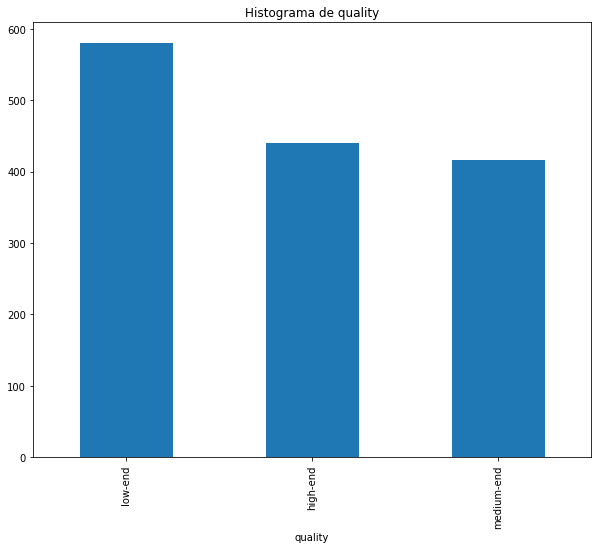

In [93]:
#Histogram car quality
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
df_copy["quality"].value_counts().plot(kind="bar")
plt.title("Histograma de quality")
plt.xlabel("quality")

Destacar que a la hora de las variables independientes vamos a considerar todas las variables, menos "price", ya que ésta no tiene sentido que forme parte de las features porque la clasificación de ésta es el objetivo del problema. Además, si en las features añadimos el "price" ya no tiene sentido crear un modelo para la clasificación, porque nosotros mismos podríamos hacerla sin necesidad de predecir.

El objetivo es por lo tanto saber qué gama de calidad del coche tenemos según la antigüedad, los km que tiene, el tamaño del motor... Sin saber el precio del coche, ya que ésta determina la gama de calidad.

In [94]:
#Create features and labels vectors
X = df_copy.iloc[:, 0:9].values
y = df_copy.iloc[:, 10].values

# Creamos una variable dummy para "fuel_type"
labelEncoder_fuel_type = LabelEncoder()
X[:, 2] = labelEncoder_fuel_type.fit_transform(X[:, 2])
transformer = ColumnTransformer(
    transformers=[
        ("fuel_type",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [2]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)
X = transformer.fit_transform(X)

# Eliminamos la primera columna para solventar los problemas de colinealidad
X = X[:, 1:]

Normalizamos todas las variables de entrada de X, menos:

* Las variables dummy para "fuel_type".
* Las variables binarias "metcolor" y "automatic".

Se ha tomado esta decisión ya que cuando las variables son binarias (toma valores de 0 y 1) carece de sentido el estandarizar las mismas, por el mero hecho de que una variable binaria puede seguir o no una distribución normal/gausiana, y si la estadarizamos/normalizamos podríamos estar suponiendo algo que no tiene el porqué cumplirse. Además, es más fácil interpretar por el modelo valores constantes como el 0 y el 1.

In [95]:
#Normalize the corresponding data
standarScaler_months = StandardScaler()
X[:, 2] = standarScaler_months.fit_transform(np.atleast_2d(X[:, 2]).T).ravel()

standarScaler_km = StandardScaler()
X[:, 3] = standarScaler_km.fit_transform(np.atleast_2d(X[:, 3]).T).ravel()

standarScaler_power = StandardScaler()
X[:, 4] = standarScaler_power.fit_transform(np.atleast_2d(X[:, 4]).T).ravel()

standarScaler_engine = StandardScaler()
X[:, 7] = standarScaler_engine.fit_transform(np.atleast_2d(X[:, 7]).T).ravel()

standarScaler_doors = StandardScaler()
X[:, 8] = standarScaler_doors.fit_transform(np.atleast_2d(X[:, 8]).T).ravel()

standarScaler_weight = StandardScaler()
X[:, 9] = standarScaler_weight.fit_transform(np.atleast_2d(X[:, 9]).T).ravel()

X = np.asarray(X).astype('float32')

In [96]:
#Binarize the labels
labelBinarizer_quality = LabelBinarizer()
y = labelBinarizer_quality.fit_transform(y)

In [97]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
#Shapes
print("La dimensión de X_train es: " + str(X_train.shape))
print("La dimensión de X_test es: " + str(X_test.shape))
print("La dimensión de y_train es: " + str(y_train.shape))
print("La dimensión de y_test es: " + str(y_test.shape))

La dimensión de X_train es: (1148, 10)
La dimensión de X_test es: (288, 10)
La dimensión de y_train es: (1148, 3)
La dimensión de y_test es: (288, 3)


### Modelo base


Empezaremos diseñando un modelo base con 4 capas ocultas.
 
Nota: Para el ajuste del modelo usaremos los datos de test como conjunto de validación.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1.25 puntos):</strong> Implementa el modelo de red neuronal artificial:
<ul>
<li>   Diseña la arquitectura para el modelo de clasificación con la función de activación adecuada para la capa de salida y con las siguientes características:</li>
   <ul>
   <li> 4 capas ocultas con 64, 32, 10, 8 neuronas sucesivamente</li>
   <li> Función de activación de las capas intermedias: ReLU</li>
   </ul>

<li>   Compila el modelo con la función de pérdida más adecuada, el optimizador Adam, una velocidad de aprendizaje de 0.1, y la métrica Accuracy.</li>

<li>   Ajusta el modelo con 20 épocas y un tamaño del batch de 64</li>

<li>   Muestra las gráficas de accuracy y loss. En cada gráfica debe visualizarse la curva de entrenamiento y la de validación</li>
</ul>
</div>

In [99]:
#Create ANN model
# https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-multi-class-classification-e940f74bd899
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

model_clas = Sequential()
model_clas.add(Dense(64, activation="relu", input_dim=X_train.shape[1])) # Capa de entrada + 1ª capa oculta
model_clas.add(Dense(32, activation="relu")) # Segunda capa oculta
model_clas.add(Dense(10, activation="relu")) # Tercera capa oculta
model_clas.add(Dense(8, activation="relu")) # Cuarta capa oculta
model_clas.add(Dense(y_train.shape[1], activation="softmax")) # Capa de salida

In [100]:
#Compile
optimizer = Adam(learning_rate=0.1)
model_clas.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [101]:
#Fit
estimator_clas = model_clas.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs = 20,
    batch_size=64,
    verbose=0
)

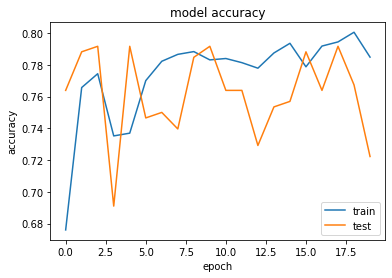

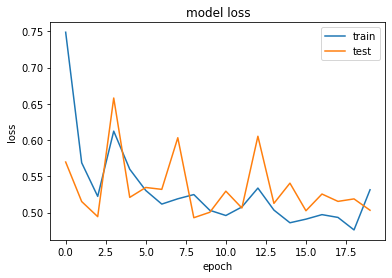

In [102]:
#Plots 
%matplotlib inline

# Visualizamos la evolución de la accuracy
plt.plot(estimator_clas.history['accuracy'])
plt.plot(estimator_clas.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Visualizamos la evolución del error cometido por la red
plt.plot(estimator_clas.history['loss'])
plt.plot(estimator_clas.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Influencia velocidad aprendizaje y optimizador

Una vez tenemos el modelo base, analizaremos la influencia que pueden tener la velocidad de aprendizaje y el tipo de optimizador en la mejora del rendimiento.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1.5 puntos):</strong> Implementa una función para entrenar la arquitectura del ejercicio anterior para 4 optimizadores diferentes: Adam, SGD, Adadelta, Adagrad, y 4 velocidades de aprendizaje: 0.001, 0.01, 0.05, 0.1. 
Entrena los modelos, y representa dos gráficas:
 <ul>
     <li> Tiempo de entrenamiento vs Velocidad de aprendizaje</li>
     <li>  <i>Accuracy</i> vs Velocidad de aprendizaje</li>
</ul>   
    
Cada gráfica debe incluir la evolución obtenida por los cuatro optimizadores para poderlos comparar mejor.
    
-----------------------------------------------------------------------------------------------------------
<b>Importante</b>: para la entrega de la PEC, fijar el parámetro <code>verbose = 0</code> en el entrenamiento de los modelos. La solución únicamente debe mostrar las gráficas resultantes.
</div>

In [103]:
#Function to compute several models changing Optimizers and learning rate
# https://github.com/jcasasr/Libro-Deep-Learning/blob/main/cap03/C03_E1_Ejemplo-NN.ipynb

def models(layers_dims, optimizer, learning_rate):

  # Capa de entrada + 1ª capa oculta
  model = Sequential()
  model.add(Dense(layers_dims[1], activation="relu", input_dim=layers_dims[0]))

  # Capas ocultas
  for i in range(2, len(layers_dims) - 1):
    model.add(Dense(
        layers_dims[i], 
        activation="relu"))
  
  # Capa de salida
  model.add(Dense(
      layers_dims[len(layers_dims) - 1], 
      activation="softmax"))
  
  # Generamos el optimizador con el learning rate
  if optimizer == "adam":
    opt = Adam(learning_rate=learning_rate)
  elif optimizer == "sgd":
    opt = SGD(learning_rate=learning_rate)
  elif optimizer == "adadelta":
    opt = Adadelta(learning_rate=learning_rate)
  else:
    opt = Adagrad(learning_rate=learning_rate)

  # Compilamos el modelo
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

  # Devolvemos el modelo
  return model

In [104]:
#Compute models

# Definimos las listas
optimizers=["adam", "sgd", "adadelta", "adagrad"]
learning_rates = [0.001, 0.01, 0.05, 0.1]
training_accuracies = []
validating_accuracies = []
training_times = []

# Definimos las dimensiones de cada capa [E,O,O,O,O,S]
layers_dims = [X_train.shape[1], 64, 32, 10, 8, y_train.shape[1]]

# Realizamos el computo de cada módelo
for opt in optimizers:
  for lr in learning_rates:
    start = timer()
    model_gridsearch_clas = models(layers_dims=layers_dims, optimizer=opt, learning_rate=lr)
    estimator_gridsearch_clas = model_gridsearch_clas.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs = 20,
        batch_size=64,
        verbose=0
    )
    end = timer()

    # Añadimos el tiempo de entrenamiento
    training_times.append(round(end-start, 5))

    # Añadimos las precisiones obtenidas
    training_accuracies.append(estimator_gridsearch_clas.history['accuracy'])
    validating_accuracies.append(estimator_gridsearch_clas.history['val_accuracy'])

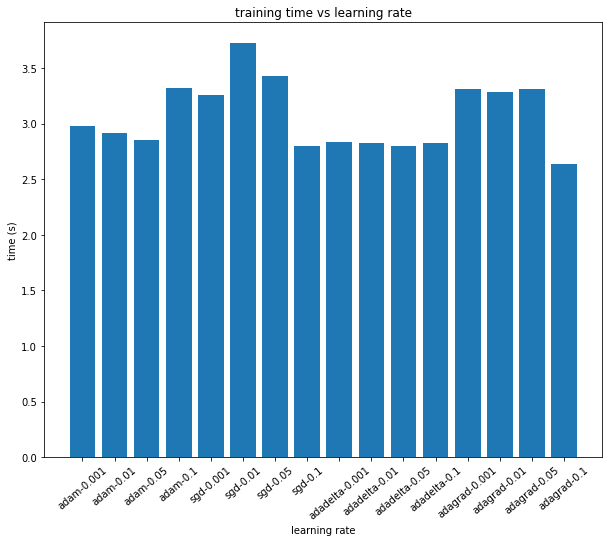

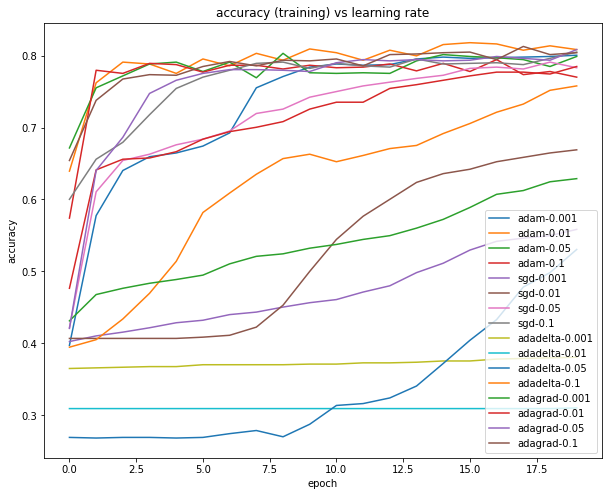

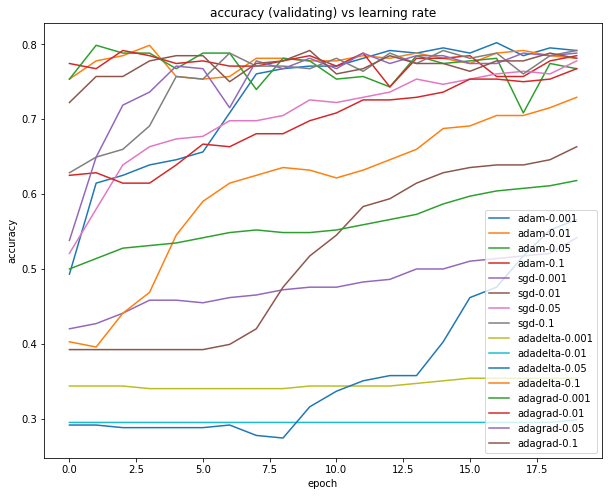

In [107]:
#Plots

# Definimos la leyenda para los gráficos
legend = [
          "adam-0.001",
          "adam-0.01",
          "adam-0.05",
          "adam-0.1",
          "sgd-0.001",
          "sgd-0.01",
          "sgd-0.05",
          "sgd-0.1",
          "adadelta-0.001",
          "adadelta-0.01",
          "adadelta-0.05",
          "adadelta-0.1",
          "adagrad-0.001",
          "adagrad-0.01",
          "adagrad-0.05",
          "adagrad-0.1",
]

# Visualizamos el tiempo de entrenamiento alcanzado por cada velocidad de aprendizaje
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
plt.bar(legend, training_times)
plt.xticks(rotation="40")
plt.title("training time vs learning rate")
plt.ylabel("time (s)")
plt.xlabel("learning rate")
plt.show()

# Visualizamos la evolución de la accuracy
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
for hist in training_accuracies:
  plt.plot(hist)
plt.title('accuracy (training) vs learning rate')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(legend, loc='lower right')
plt.show()

# # Visualizamos la evolución de la accuracy en test
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
for hist in validating_accuracies:
  plt.plot(hist)
plt.title('accuracy (validating) vs learning rate')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(legend, loc='lower right')
plt.show()

### Elección del mejor modelo

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Identifica el valor de la velocidad de aprendizaje y del optimizador que mejor rendimiento dan al modelo, según los resultados del ejercicio anterior:
<ul>
    
<li>   Justifica la elección</li>
<li>   Compila y entrena el modelo elegido</li>
<li>   Muestra las correspondientes gráficas de <i>Accuracy</i> y <i>Loss</i> de los conjuntos de entrenamiento y validación, e indica el <i>Accuracy</i> del modelo </li>
<li>   Muestra la matriz de confusión multi-clase con las etiquetas originales de <code>quality</code> (<i>low-end</i>, <i>medium-end</i>, <i>high-end</i>)</li>
<li>   Muestra la precisión, recall y F1-score resultantes para cada etiqueta</li>
<li>   Comenta los resultados obtenidos</li>
</ul>
</div>

In [ ]:
# Election

El mejor modelo adam-0.001 o adam-0.01:
* más suave el progreso en la precisión aunque tarda un poco más en entrenear que adagrad

In [108]:
#Create, compile and fit ANN BEST model
model_best_clas = models(layers_dims=layers_dims, optimizer="adam", learning_rate=0.001)
estimator_best_clas = model_best_clas.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs = 20,
    batch_size=64,
    verbose=0
)

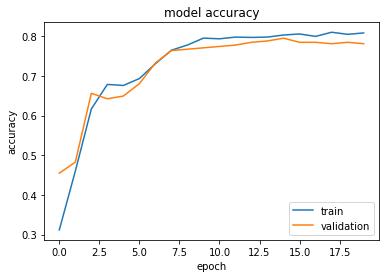

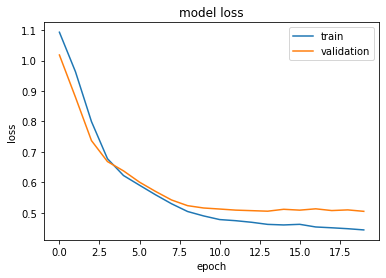

In [109]:
#Plots

# Visualizamos la evolución de la accuracy
plt.plot(estimator_best_clas.history['accuracy'])
plt.plot(estimator_best_clas.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# Visualizamos la evolución del error cometido por la red
plt.plot(estimator_best_clas.history['loss'])
plt.plot(estimator_best_clas.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

[Text(0, 0.5, 'high-end'), Text(0, 1.5, 'low-end'), Text(0, 2.5, 'medium-end')]

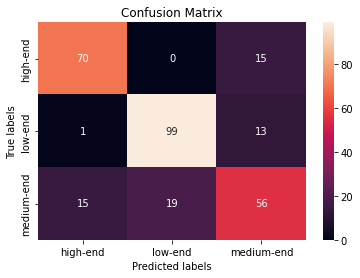

In [110]:
#Confusion matrix
y_preds = model_best_clas.predict(X_test)

# Transformación inversa para saber las etiquetas de y_test
y_test_labels = labelBinarizer_quality.inverse_transform(y_test)

# Transofrmación inversa para saber las etiquetas de y_preds
for pred in y_preds:
  pos_max = pred.argmax() 
  pred[pos_max] = 1
  pred[np.where(pred < 1)] = 0
y_preds_labels = labelBinarizer_quality.inverse_transform(y_preds)

# Matriz de confusion
matrix = confusion_matrix(y_test_labels, y_preds_labels)

# Visualización de la matriz de confusión
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['high-end', 'low-end', 'medium-end'])
ax.yaxis.set_ticklabels(['high-end', 'low-end', 'medium-end'])

In [122]:
#Accuracy
accuracy = (matrix[0,0] + matrix[1,1] + matrix[2,2]) / sum(sum(matrix))
print("La precisión: " + str(round(accuracy * 100, 2)) + " %")

La precisión: 78.12 %


In [123]:
#Precision, Recall and F1-score for each label
print(classification_report(y_test_labels, y_preds_labels))

              precision    recall  f1-score   support

    high-end       0.81      0.82      0.82        85
     low-end       0.84      0.88      0.86       113
  medium-end       0.67      0.62      0.64        90

    accuracy                           0.78       288
   macro avg       0.77      0.77      0.77       288
weighted avg       0.78      0.78      0.78       288



In [97]:
#Comment results


## 3. Red neuronal artificial: Regresión (4.5 puntos)

En este apartado resolveremos un problema de regresión intentando predecir el precio de re-venta según las características de los coches. Partiremos del conjunto de datos original.

### Pre-procesado




<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (0.5 puntos):</strong> Pre-procesa los datos: 
<ul>
<li>   Crea los vectores de variables independientes (<i>features</i>) y de la variable dependiente (<i>target</i>)</li>
<li>   Normaliza debidamente los datos</li>
<li>   Divide el conjunto de datos en 70% para entrenamiento y 30% para test, usando la función <code>train_test_split</code></li>
<li>   Muestra las dimensiones de los conjuntos de entrenamiento y test</li>
</ul>
</div>

In [51]:
#Create features and target vectors
X = df_copy.iloc[:, 0:9].values
y = df_copy.iloc[:, 9].values

# Creamos una variable dummy para "fuel_type"
labelEncoder_fuel_type = LabelEncoder()
X[:, 2] = labelEncoder_fuel_type.fit_transform(X[:, 2])
transformer = ColumnTransformer(
    transformers=[
        ("fuel_type",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [2]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)
X = transformer.fit_transform(X)

# Eliminamos la primera columna para solventar los problemas de colinealidad
X = X[:, 1:]

Normalizamos todas las variables de entrada de X, menos:

* Las variables dummy para "fuel_type".
* Las variables binarias "metcolor" y "automatic".

Se ha tomado esta decisión ya que cuando las variables son binarias (toma valores de 0 y 1) carece de sentido el estandarizar las mismas, por el mero hecho de que una variable binaria puede seguir o no una distribución normal/gausiana, y si la estadarizamos/normalizamos podríamos estar suponiendo algo que no tiene el porqué cumplirse. Además, es más fácil interpretar por el modelo valores constantes como el 0 y el 1.



In [52]:
#Normalizing the data
# Estandarizamos X
standarScaler_months = StandardScaler()
X[:, 2] = standarScaler_months.fit_transform(np.atleast_2d(X[:, 2]).T).ravel()

standarScaler_km = StandardScaler()
X[:, 3] = standarScaler_km.fit_transform(np.atleast_2d(X[:, 3]).T).ravel()

standarScaler_power = StandardScaler()
X[:, 4] = standarScaler_power.fit_transform(np.atleast_2d(X[:, 4]).T).ravel()

standarScaler_engine = StandardScaler()
X[:, 7] = standarScaler_engine.fit_transform(np.atleast_2d(X[:, 7]).T).ravel()

standarScaler_doors = StandardScaler()
X[:, 8] = standarScaler_doors.fit_transform(np.atleast_2d(X[:, 8]).T).ravel()

standarScaler_weight = StandardScaler()
X[:, 9] = standarScaler_weight.fit_transform(np.atleast_2d(X[:, 9]).T).ravel()

X = np.asarray(X).astype('float32')

# Estandarizamos y
standarScaler_price = StandardScaler()
y = standarScaler_price.fit_transform(np.atleast_2d(y).T).ravel()

In [53]:
#Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
#Dimensions
print("La dimensión de X_train es: " + str(X_train.shape))
print("La dimensión de X_test es: " + str(X_test.shape))
print("La dimensión de y_train es: " + str(y_train.shape))
print("La dimensión de y_test es: " + str(y_test.shape))

La dimensión de X_train es: (1005, 10)
La dimensión de X_test es: (431, 10)
La dimensión de y_train es: (1005,)
La dimensión de y_test es: (431,)


### Modelo base

En primer lugar diseñaremos un modelo base con tres capas ocultas.

Nota: Para el ajuste del modelo usaremos los datos de test como conjunto de validación.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Implementa el modelo de red neuronal artificial:
<ul>
<li>Diseña la arquitectura para el modelo de regresión con las siguientes características:</li>
    <ul>
   <li>1 primera capa oculta completamente conectada de 128 neuronas y activación ReLU</li>
   <li>2 capas ocultas de 32 y 16 neuronas y activación tangencial</li>
   <li>Todas las capas deben tener <code>kernel_initizalizer</code> en modo 'normal'</li>
   </ul>
<li>Compila el modelo con la función de pérdida más adecuada y el optimizador Adam</li>

<li>Ajusta el modelo con 50 épocas y un tamaño del batch de 32</li>

<li>Muestra la gráfica de pérdida. En la gráfica debe visualizarse la curva de entrenamiento y la de validación</li>
</ul>
</div>

In [55]:
#Create ANN model
# https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-regression-a80a906f634c
# https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
model_reg = Sequential()
model_reg.add(Dense(128, activation="relu", kernel_initializer="normal", input_dim=X_train.shape[1])) # Capa de entrada + 1ª capa oculta
model_reg.add(Dense(32, activation="tanh", kernel_initializer="normal")) # Segunda capa oculta
model_reg.add(Dense(16, activation="tanh", kernel_initializer="normal")) # Tercera capa oculta
model_reg.add(Dense(1, activation="linear", kernel_initializer="normal")) # Capa de salida

In [56]:
#Compiling the model
model_reg.compile(loss="mse", optimizer="adam", metrics=["mse"])

In [57]:
#Fit model
estimator_reg = model_reg.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=0
)

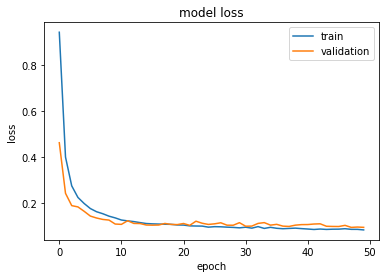

In [58]:
#Plots
# Visualizamos la evolución del error cometido por la red
plt.plot(estimator_reg.history['loss'])
plt.plot(estimator_reg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Búsqueda hiperparámetros

Una vez tenemos el modelo base nos interesa buscar la configuración de hiperparámetros que nos proporcione una mejor predicción del precio de re-venta de los coches. En este apartado haremos una búsqueda de hiperparámetros, recorriendo varios valores de número de capas, número de neuronas, tamaño del batch y épocas.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1.75 puntos):</strong> Implementa una función que evalúe distintos modelos combinando las siguientes características:
<ul>    
   <li>Tres arquitecturas diferentes con las siguientes configuraciones de número de capas ocultas (completamente conectadas) y número de neuronas en cada capa:</li>
        <ul>
        <li>[128, 64, 16]</li>
        <li>[16, 4]</li>
        <li>[4, 4]</li>
        </ul> 
   <li>Tamaño del batch de 16 y 32</li>
   <li>Épocas de 20, 50 y 100</li>
</ul>   
    
    
Como en el ejercicio anterior, la primera capa oculta tendrá siempre activación ReLU y las demás activación tangencial. El inicializador de kernel estará en modo 'normal' y usaremos el optimizador Adam.

    
La función deberá proporcionar una tabla con los siguientes campos: arquitectura de la red seleccionada, épocas, tamaño del batch, tiempo de entrenamiento, y raíz del error cuadrático medio (RMSE) del modelo 

-----------------------------------------------------------------------------------------------------------
<b>Importante</b>: para la entrega de la PEC, fijar el parámetro <code>verbose = 0</code> en el entrenamiento de los modelos. La solución únicamente debe mostrar la tabla resultante.
</div>

In [59]:
# Function to create a regression model
def model_reg(layer_dim):
  # Capa de entrada + 1ª capa oculta
  model = Sequential()
  model.add(Dense(layer_dim[1], activation="relu", kernel_initializer="normal", input_dim=layer_dim[0]))

  # Capas ocultas
  for i in range(2, len(layer_dim) - 1):
    model.add(Dense(
        layer_dim[i], 
        activation="tanh",
        kernel_initializer="normal"))
  
  # Capa de salida
  model.add(Dense(
      1, 
      activation="linear",
      kernel_initializer="normal"))

  # Compilamos el modelo
  model.compile(loss="mse", optimizer="adam")

  # Devolvemos el modelo
  return model

In [74]:
#Hiperparameter search function
def models_reg(layers_dims, epochs, batch_sizes):

  # Inicializamos la tabla que se devolverá
  df_summary = pd.DataFrame()
  df_summary["Layers_Dims"] = None
  df_summary["Epoch"] = None
  df_summary["Batch_Size"] = None
  df_summary["Time_Training"] = None
  df_summary["RMSE"] = None

  # Recorremos todas las posibles configuraciones
  for layer_dim in layers_dims:
    for epoch in epochs:
      for batch_size in batch_sizes:
        # Creamos el modelo
        model = model_reg(layer_dim)

        # Ajustamos el modelo
        start = timer()
        estimator = model.fit(
            X_train,
            y_train,
            epochs=epoch,
            batch_size=batch_size,
            verbose=0
        )
        end = timer()

        # Predecimos
        y_pred = model.predict(X_test)

        # Calculamos el RMSE
        # rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 5)
        rmse = round(np.sqrt(mean_squared_error(standarScaler_price.inverse_transform(np.atleast_2d(y_test).T).ravel(), 
                                                standarScaler_price.inverse_transform(np.atleast_2d(y_pred).T).ravel())), 2)

        # Añadimos la fila a la tabla
        row = {
            "Layers_Dims": layer_dim,
            "Epoch": epoch,
            "Batch_Size": batch_size,
            "Time_Training": round(end-start, 5),
            "RMSE": rmse
            }   
        df_summary = df_summary.append(row, ignore_index=True)

  # Devolvemos la tabla
  return df_summary

In [75]:
#Compute search
layers_dims= [
              [X_train.shape[1], 128, 64, 16, 1],
              [X_train.shape[1], 16, 4, 1],
              [X_train.shape[1], 4, 4, 1]
]
epochs = [20, 50, 100]
batch_sizes = [16, 32]

df_summary = models_reg(layers_dims=layers_dims, epochs=epochs, batch_sizes=batch_sizes)
df_summary

,Layers_Dims,Epoch,Batch_Size,Time_Training,RMSE
0,"[10, 128, 64, 16, 1]",20,16,11.52980,1136.06
1,"[10, 128, 64, 16, 1]",20,32,6.18064,1177.04
2,"[10, 128, 64, 16, 1]",50,16,10.60493,1124.37
3,"[10, 128, 64, 16, 1]",50,32,5.55714,1116.15
4,"[10, 128, 64, 16, 1]",100,16,21.14890,1261.02
5,"[10, 128, 64, 16, 1]",100,32,21.44105,1143.40
6,"[10, 16, 4, 1]",20,16,2.92972,1296.99
7,"[10, 16, 4, 1]",20,32,2.37977,1417.80
8,"[10, 16, 4, 1]",50,16,7.05339,1198.31
9,"[10, 16, 4, 1]",50,32,5.74792,1196.57


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (0.25 puntos):</strong> Representa en un gráfico el RMSE vs la configuración de los modelos 

</div>

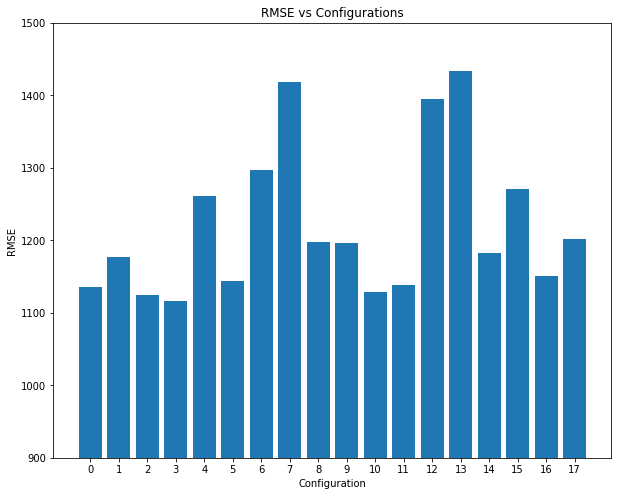

In [77]:
#Plot
# Visualizamos el RMSE por cada configuración
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
ax = plt.gca()
ax.set_ylim([900, 1500])
plt.bar([str(x) for x in df_summary.index.values], df_summary["RMSE"])
plt.title("RMSE vs Configurations")
plt.ylabel("RMSE")
plt.xlabel("Configuration")
plt.show()

### Elección mejor modelo y predicción

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Identifica la configuración que proporciona mejores resultados:
<ul> 
<li>Justifica la elección del modelo</li>
<li>Compila y entrena el modelo elegido. Nota: para la entrega, presentar con verbose=0</li>
<li>Muestra la correspondiente gráfica de pérdida de los conjuntos de entrenamiento y validación</li>
<li>Calcula las predicciones del precio y muestra en una tabla el Precio original (<code>price</code>) y el Precio predicho (<code>predicted_price</code>) para las 10 primeras filas del conjunto de test</li>
<li>Comenta los resultados obtenidos</li>
</ul> 
</div>

In [ ]:
#Best configuration justification


In [78]:
#Create, compile and fit ANN best model
model_best_reg = model_reg(layer_dim=[X_train.shape[1], 128, 64, 16, 1])
estimator_best_reg = model_best_reg.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=0
)

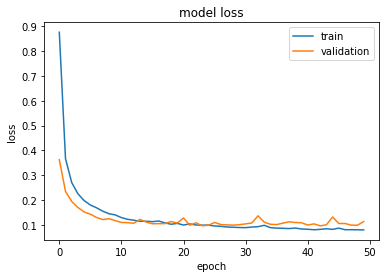

In [79]:
#Plot
# Visualizamos la evolución del error cometido por la red
plt.plot(estimator_best_reg.history['loss'])
plt.plot(estimator_best_reg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [80]:
#Generate Predictions on testing data
y_pred = model_best_reg.predict(X_test)

df_price = pd.DataFrame()
df_price["price"] = standarScaler_price.inverse_transform(np.atleast_2d(y_test).T).ravel()
df_price["predicted_price"] = [round(pred, 0) for pred in standarScaler_price.inverse_transform(np.atleast_2d(y_pred).T).ravel()]
df_price["difference"] = np.abs(df_price["price"] - df_price["predicted_price"])

df_price.head(10)

,price,predicted_price,difference
0,10500.0,10593.0,93.0
1,10750.0,12068.0,1318.0
2,8650.0,9883.0,1233.0
3,10950.0,11941.0,991.0
4,11250.0,10525.0,725.0
5,10250.0,10692.0,442.0
6,10950.0,10094.0,856.0
7,19950.0,19216.0,734.0
8,12950.0,11218.0,1732.0
9,12500.0,12425.0,75.0


In [ ]:
#Comment results
